## About the notebook

This notebook has a mixture of commnets from the [Pedro Marcelino](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python), [Dominik GawlikHouse](https://www.kaggle.com/dgawlik/house-prices-eda) from Kaggle, and myslef. This notebook is meant for giving your fisrt steps in practicing and having fun with Data Science techniques.

* [Understanding our data set](#section1)
    * [So... What can we expect?](#section1_1)
    * [Numerical (quantitative) data](#section2)
    * [Quick look at the other numerical variables; Are they distributed normally?](#section2_1)
    * ['SalePrice', her buddies and her interests](#section2_2)
    * [Categorical (qualitative) data](#section2_3)
* [Keep calm and work smart](#section3)

## Comprehensive Data Exploration with Pyhotn

'The most difficult thing in life is to know yourself'
This quote belongs to Thales of Miletus. Thales was a Greek/Phonecian philosopher, mathematician and astronomer, which is recognised as the first individual in Western civilisation known to have entertained and engaged in scientific thought (source: https://en.wikipedia.org/wiki/Thales)

I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.
So I tried to learn how to swim before jumping into the water. Based on Hair et al. (2013), chapter 'Examining your data', I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous study in this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem.

Despite the strange names I gave to the chapters, what we are doing in this kernel is something like:

1. **Understand the problem**. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

2. **Univariable study**. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.

3. **Multivariate study**. We'll try to understand how the dependent variable and independent variables relate.

4. **Basic cleaning**. We'll clean the dataset and handle the missing data, outliers and categorical variables.

5. **Test assumptions**. We'll check if our data meets the assumptions required by most multivariate techniques.

Now, it's time to have fun!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler # preprosessing data http://scikit-learn.org/stable/modules/preprocessing.html
import warnings
warnings.filterwarnings('ignore') # https://docs.python.org/2/library/warnings.html
# sns.set_style('whitegrid')
sns.set_style(style='ticks')
%matplotlib inline

<a id="section1"></a>
### Undestanding our data set

In [176]:
# importing training data set
df_train = pd.read_csv('train.csv')

In [177]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's find the number of qualitative(categorical) and quantitative(numerical) we have in our dataset. 

In [42]:
# Features
df_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [43]:
len(df_train.columns)

81

In [6]:
# type of data
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [3]:
#We can also append all of them in two lists
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
# quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [4]:
print len(qualitative)
print len(quantitative)

43
37


There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 37 (including 'SalePrice) is quantitative, 43 categorical + Id and SalePrice.

*Quantitative:* 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold, SalePrice

*Qualitative:* Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities.

First we will look at the quantitaive (numerical) data.

<a id="section1_1"></a>

## So... What can we expect?

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:

* **Variable** - Variable name.
* **Type** - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.
* **Segment** - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').
* **Expectation** - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
* **Conclusion** - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.
* **Comments** - Any general comments that occured to us.

While 'Type' and 'Segment' is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:

* Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).

* If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).

* Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

After this daunting exercise, we can filter the spreadsheet and look carefully to the variables with 'High' 'Expectation'. Then, we can rush into some scatter plots between those variables and 'SalePrice', filling in the 'Conclusion' column which is just the correction of our expectations.

I went through this process and concluded that the following variables can play an important role in this problem:

* OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).
* YearBuilt.
* TotalBsmtSF.
 *GrLivArea.
 
I ended up with two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea'). This might be a little bit unexpected as it goes against the real estate mantra that all that matters is 'location, location and location'. It is possible that this quick data examination process was a bit harsh for categorical variables. For example, I expected the 'Neigborhood' variable to be more relevant, but after the data examination I ended up excluding it. Maybe this is related to the use of scatter plots instead of boxplots, which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.

However, the main point of this exercise was to think a little about our data and expectactions, so I think we achieved our goal. Now it's time for 'a little less conversation, a little more action please'. Let's shake it!


<a id="section2"></a>
## Numerical (quantitative) data

### First things first: analysing 'SalePrice'

In this section, Marcelo tried to make an analogy to dating to get an undestading of how 'SalesPrice' correlates with other variables. I found it a bit funny,so I left his analogy the way he mentioned. Besides, I added some extra infomration about the Skewness and Kurtosis of 'SalePrice'. Ase well, I show two diffente ways ways to plot and fit some distributions in a different fashion from Dominik, and see how the other numerical features are not normaly distributed.

'SalePrice' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to men, dancing or alcohol, according to your preferences)

Using the women analogy, let's build a little story, the story of 'How we met 'SalePrice''.
Everything started in our Kaggle party, when we were looking for a dance partner. After a while searching in the dance floor, we saw a girl, near the bar, using dance shoes. That's a sign that she's there to dance. We spend much time doing predictive modelling and participating in analytics competitions, so talking with girls is not one of our super powers. Even so, we gave it a try:

*'Hi, I'm Kaggly! And you? 'SalePrice'? What a beautiful name! You know 'SalePrice', could you give me some data about you? I just developed a model to calculate the probability of a successful relationship between two people. I'd like to apply it to us!'*

In [9]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
# Cheking if there are NaN values in sale price
def isnullcheck(df_slice):
    for row in df_slice.isnull():
        if row:
            print row

In [11]:
isnullcheck(df_train['SalePrice'])

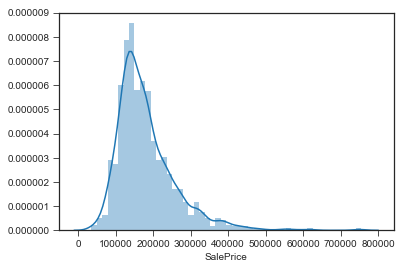

In [12]:
sns.distplot(df_train['SalePrice'], bins=50)

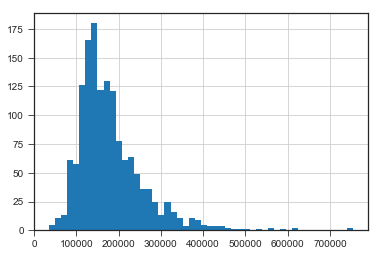

In [13]:
df_train['SalePrice'].hist(bins=50)

*Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you*:
* **Deviate from the normal distribution.**
* **Have appreciable positive skewness.**
* **Show peakedness(Kurtosis).**

*This is getting interesting! 'SalePrice', could you give me your body measures?'*

In [14]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


A normal distribution is a symmetric distribution with well-behaved tails. This is indicated by the skewness of 0.03. The kurtosis of 2.96 is near the expected value of 3. Therefore, the Kurtosis of a distribution gives an idea of the degree of pickness of the distribution.

So, if a dataset has a positive kurtosis, it has more in the tails than the normal distribution. If a dataset has a negative kurtosis, it has less in the tails than the normal distribution.

In a **positively skewed** distribution, the extreme scores are larger, thus the **mean is larger than the median**. A **negatively skewed** distribution is asymmetrical and points in the negative direction, such as would result with the **meadian larger than the mean**.

<img src="skewness.jpg" alt="jupyter" style="width: 400px;"/> 


*'Amazing! If my love calculator is correct, our success probability is 97.834657%. I think we should meet again! Please, keep my number and give me a call if you're free next Friday. See you in a while, crocodile!'*

We can check how sales price fits to some copntinues districbutions. We will genetate the pots in two different ways.

Johnson SU
Normal Log
Normal


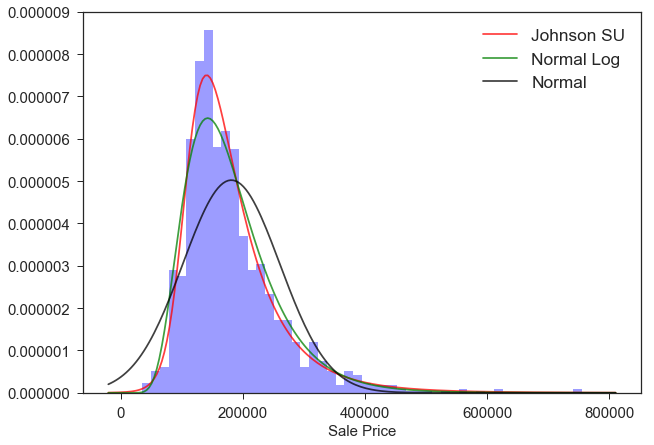

In [15]:
fig_dist_fit, ax = plt.subplots(figsize=(10, 7))
dist_to_fit = {'Johnson SU': stats.johnsonsu, 'Normal': stats.norm, 'Normal Log': stats.lognorm}
color = {'Johnson SU':'r', 'Normal':'k', 'Normal Log':'g'}
for key, dist in dist_to_fit.iteritems():
    print key
    sns.distplot(df_train['SalePrice'], kde=False, ax=ax, fit=dist, color='b', bins=50, hist_kws = {'alpha': 0.15}, fit_kws = {'color': color[key], 'label': key, 'alpha' : 0.75})
    ax.legend(loc='upper right', fontsize='xx-large')
    ax.tick_params(labelsize=15)
    ax.set_xlabel('Sale Price', fontsize=15)

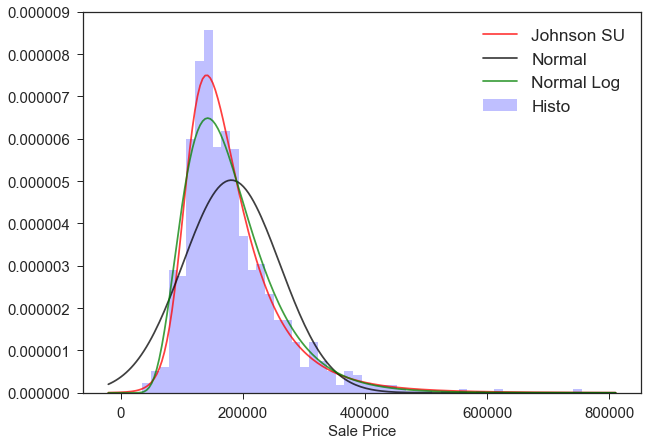

In [16]:
fig_dist_fit, ax = plt.subplots(figsize=(10, 7))
sns.distplot(df_train['SalePrice'], kde=False, ax=ax, fit=stats.johnsonsu, color='b', bins=50, hist_kws = {'alpha': 0.25, 'label': 'Histo'}, fit_kws = {'color': 'r', 'label': 'Johnson SU', 'alpha' : 0.75})
sns.distplot(df_train['SalePrice'], kde=False, ax=ax, fit=stats.norm, color='b', bins=50, hist_kws = {'alpha': 0.0}, fit_kws = {'color': 'k', 'label': 'Normal', 'alpha' : 0.75})
sns.distplot(df_train['SalePrice'], kde=False, ax=ax, fit=stats.lognorm, color='b', bins=50, hist_kws = {'alpha': 0.0}, fit_kws = {'color': 'g', 'label': 'Normal Log', 'alpha' : 0.75})
ax.legend(loc='best', fontsize='xx-large')
ax.tick_params(labelsize=15)
ax.set_xlabel('Sale Price', fontsize=15)


SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. We can see that the best fit is unbounded Johnson distribution, however Normalised log transformation does pretty good job.

<a id="section2_1"></a>
### Quick look at the other numerical variables; Are they distributed normally?

We can explore using the 'melt' method and the list of the quantitative features.

In [14]:
df_quant = pd.melt(df_train, value_vars=quantitative, var_name='Feature')
df_quant.head()

,Feature,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0


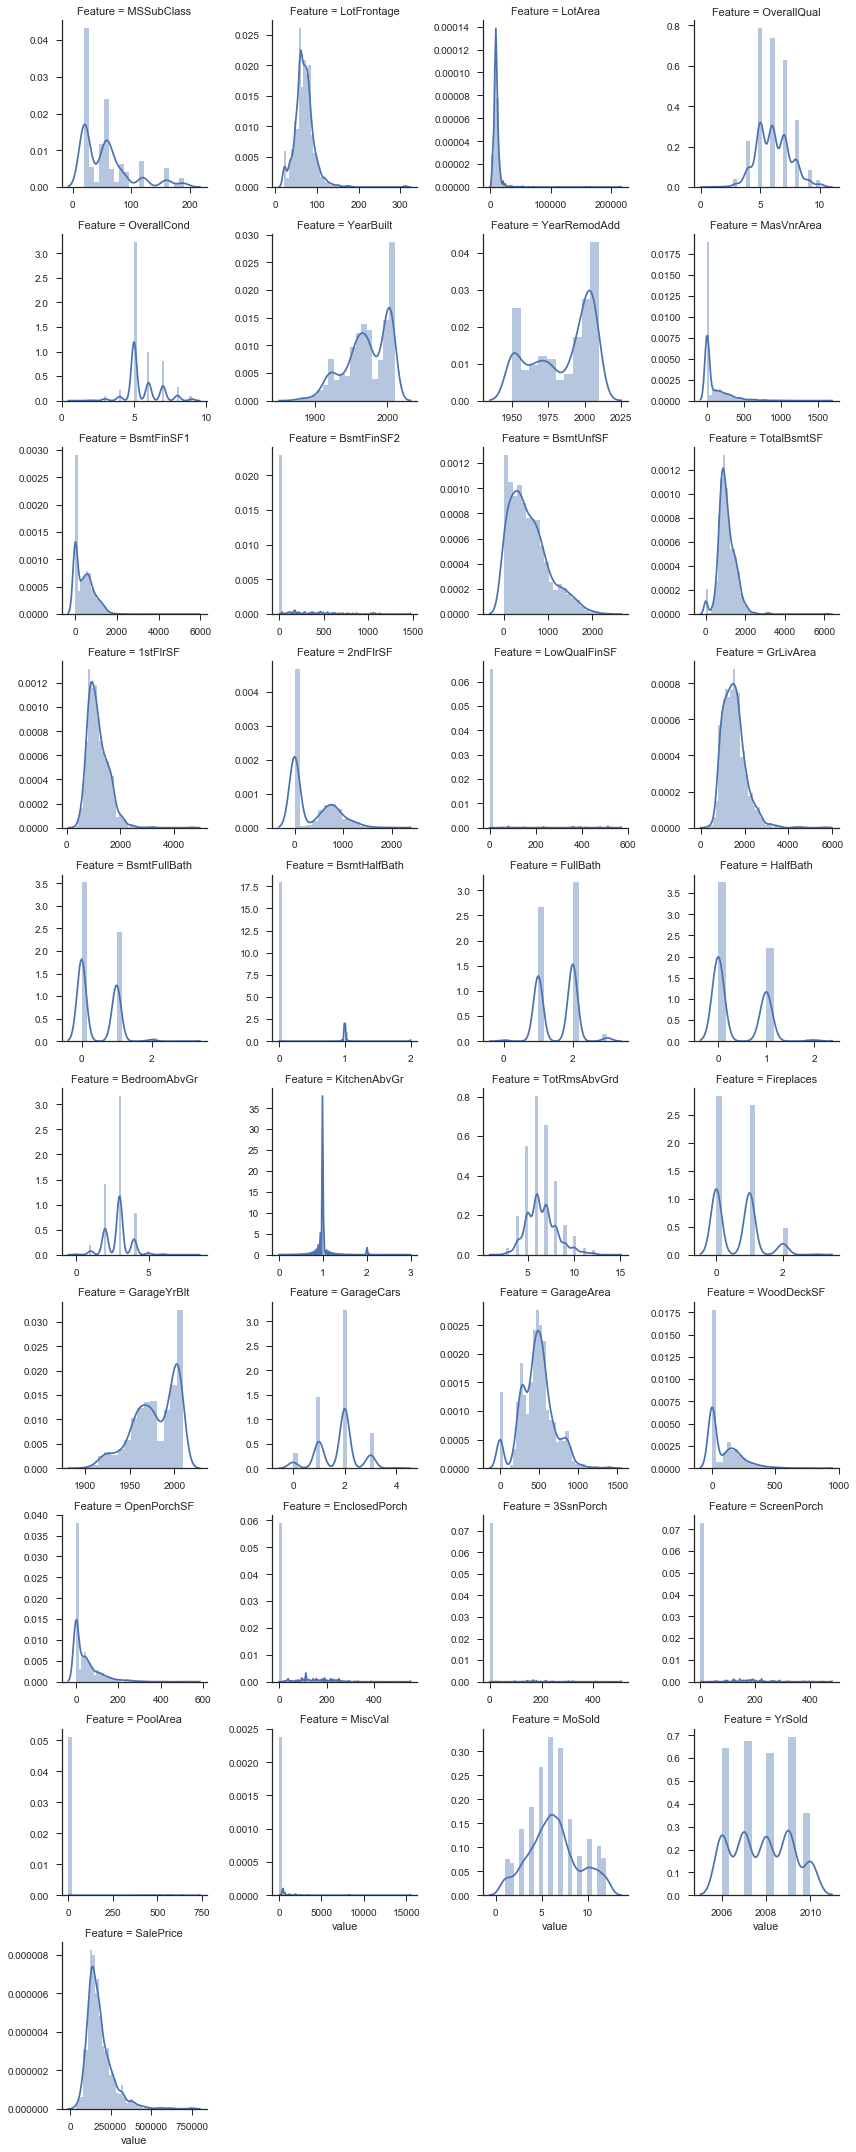

In [28]:
# We chose FacetGrid to make a plot for each feature. Each plot has independent (x,y) axis 
g = sns.FacetGrid(df_quant, col="Feature", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

We can see that some of the distribtutions of the independent variables can be modeled with Norm-Log or a Johnson SU, such as 'LontFrontage', 'LotArea', 'BsmtUnfSF, 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr'. While ganining on regression transformation will smooth out some irregularities which could be important like large amount of houses with 0 '2ndFlrSF' or 0 '3SsnPorch' or 0 'ScreenPorch'. Such irregularities are good candidates for feature construction. 

<a id="section2_2"></a>

## 'SalePrice', her buddies and her interests

*It is military wisdom to choose the terrain where you will fight. As soon as 'SalePrice' walked away, we went to Facebook. Yes, now this is getting serious. Notice that this is not stalking. It's just an intense research of an individual, if you know what I mean.*

*According to her profile, we have some common friends. Besides Chuck Norris, we both know 'GrLivArea' and 'TotalBsmtSF'. Moreover, we also have common interests such as 'OverallQual' and 'YearBuilt'. This looks promising!
To take the most out of our research, we will start by looking carefully at the profiles of our common friends and later we will focus on our common interests.*

### Relationship with numerical variables

In [22]:
df_train['GrLivArea'].dtypes

dtype('int64')

In [29]:
df_train['GrLivArea'].max()

5642

In [30]:
df_train['SalePrice'].max()

755000

In [23]:
isnullcheck(df_train['GrLivArea'])

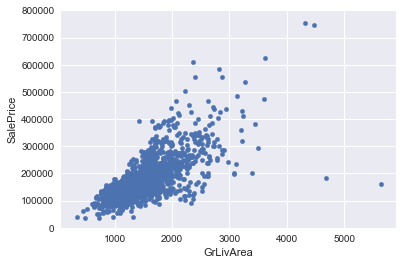

In [18]:
df_train.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

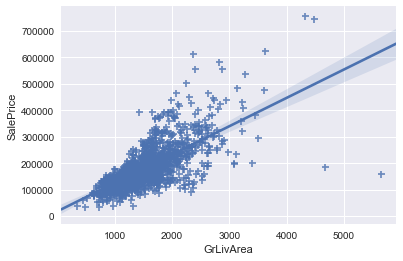

In [35]:
# SalePrince in Dollars and GrLivArea in ssqared feet
sns.regplot(x='GrLivArea', y='SalePrice', data=df_train, marker="+")

*Hmmm... It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a linear relationship.*

And what about 'TotalBsmtSF'?

In [27]:
df_train['TotalBsmtSF'].dtypes

dtype('int64')

In [31]:
df_train['TotalBsmtSF'].max()

6110

In [28]:
isnullcheck(df_train['TotalBsmtSF'])

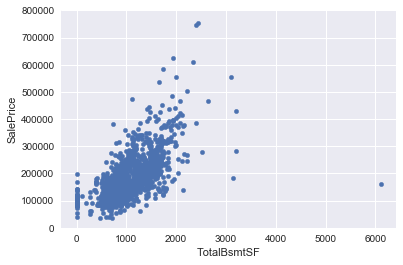

In [32]:
#scatter plot totalbsmtsf (basement in sqrt feet)/saleprice 
df_train.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

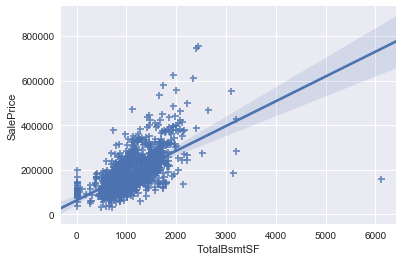

In [34]:
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df_train, marker="+")

'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in **a strong linear (exponential?) reaction**, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

'OverallQual' is a numerical feature defined as *overall material and finish quality*. It is uknown how this number was computed and the real meening. We can explore to try to find the relationship with the 'SalePrice'.

Remember to see notes on boxpot: http://www.physics.csbsju.edu/stats/box2.html

In [36]:
df_train['OverallQual'].dtypes

dtype('int64')

In [37]:
isnullcheck(df_train['OverallQual'])

(-0.5, 9.5, 0, 800000)

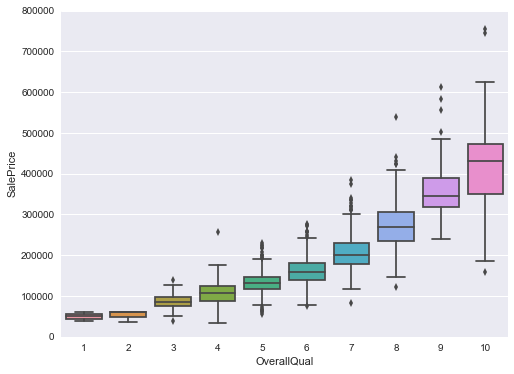

In [40]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000)

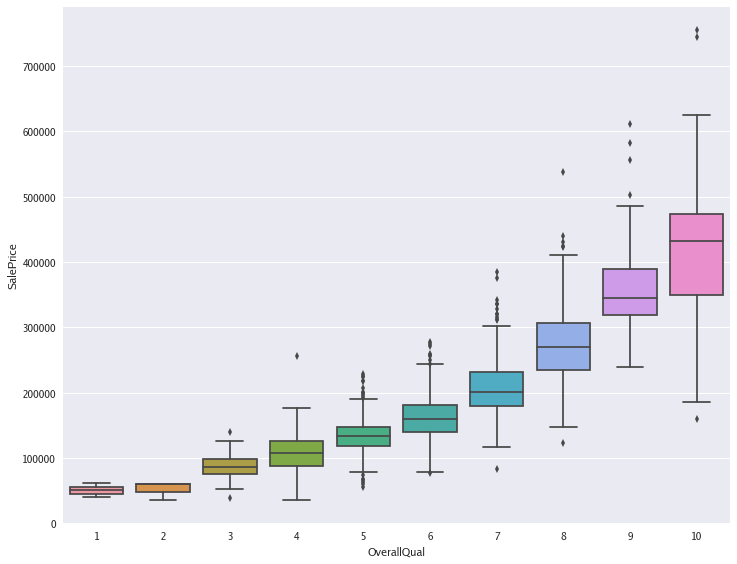

In [49]:
sns.set(font='Luxi Sans')
sns.set_context(font_scale=15)
sns.factorplot(x='OverallQual', y="SalePrice", data=df_train, kind='box',size=8, aspect=1.3)

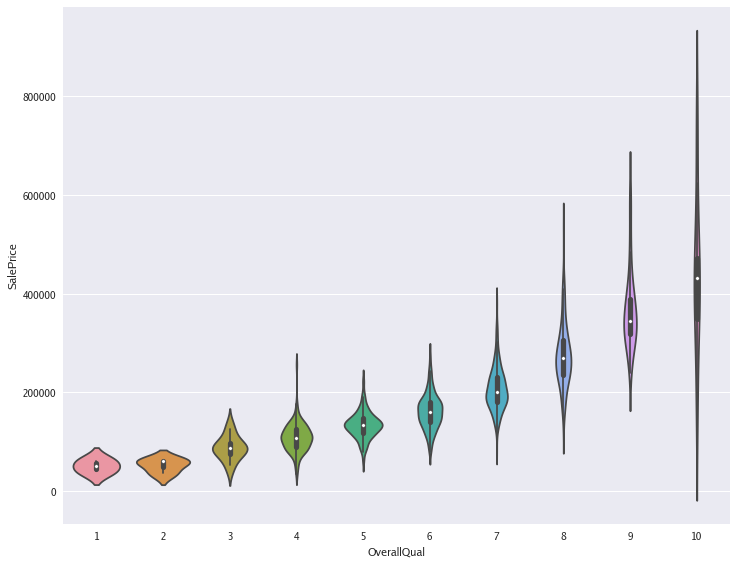

In [50]:
sns.set(font='Luxi Sans')
sns.set_context(font_scale=15)
sns.factorplot(x='OverallQual', y="SalePrice", data=df_train, kind='violin',size=8, aspect=1.3)

The price increasses with 'OverallQual'. it gets more disperse as the "OverallQual" increasses too

*Like all the pretty girls, 'SalePrice' enjoys 'OverallQual'. Note to self: consider whether McDonald's is suitable for the first date.*

Let's check now with the 'YearBuilt' how it changes.

In [53]:
df_train['YearBuilt'].dtypes

dtype('int64')

In [54]:
isnullcheck(df_train['YearBuilt'])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

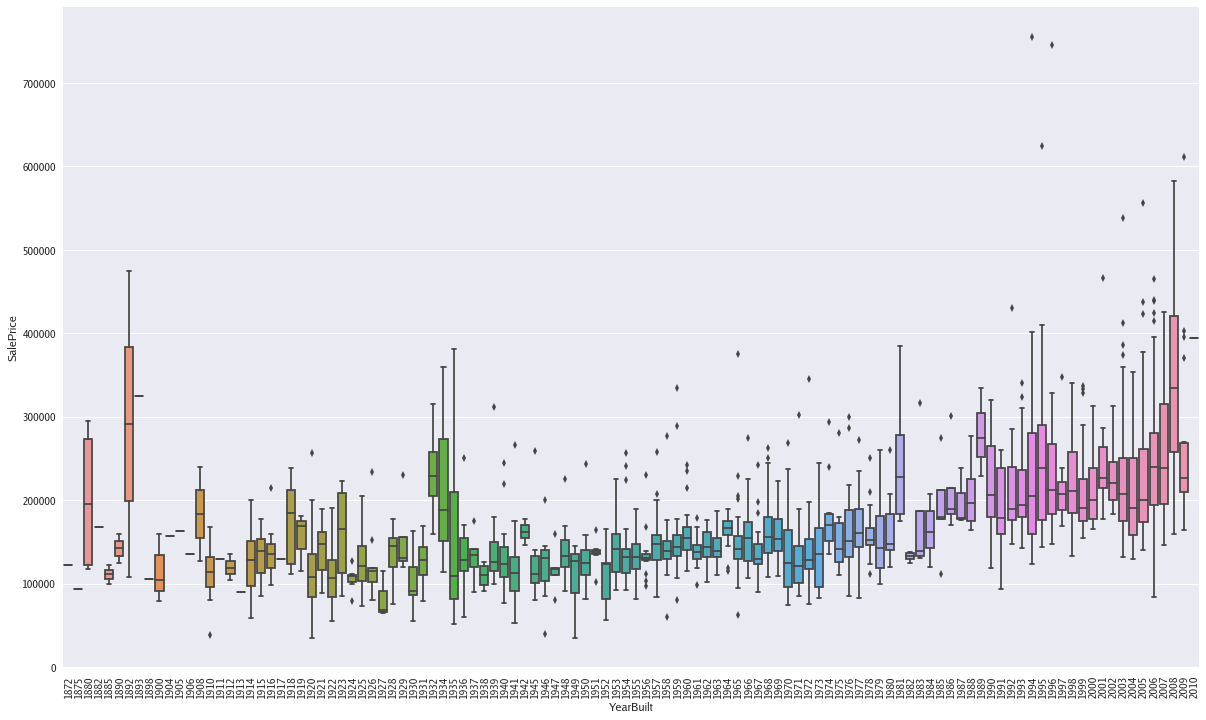

In [64]:
sns.factorplot(x='YearBuilt', y="SalePrice", data=df_train, kind='box',size=10, aspect=1.7)
plt.xticks(rotation=90)

*Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.*

**Note:** we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

### In summary

Stories aside, we can conclude that:

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

That said, let's separate the wheat from the chaff.

<a id="section2_3"></a>

## Categorical (qualitative) data

With qualitative variables we can implement two methods:
* Check distribution of 'SalePrice' with respect to variable values and enumerate them.
* SCreate dummy variable for each possible category.

In [5]:
# Cheking the type of the data category which will be change to category
df_train[qualitative].dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [178]:
df_train[qualitative].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [179]:
# changing the objec type of the features to 'category' and visualising the categories found in each of them
for categ in qualitative:
    df_train[categ] = df_train[categ].astype('category')
    print 'Categorical variable: %s' % categ, ', Categories: {}'.format(df_train[categ].cat.categories)

Categorical variable: MSZoning , Categories: Index([u'C (all)', u'FV', u'RH', u'RL', u'RM'], dtype='object')
Categorical variable: Street , Categories: Index([u'Grvl', u'Pave'], dtype='object')
Categorical variable: Alley , Categories: Index([u'Grvl', u'Pave'], dtype='object')
Categorical variable: LotShape , Categories: Index([u'IR1', u'IR2', u'IR3', u'Reg'], dtype='object')
Categorical variable: LandContour , Categories: Index([u'Bnk', u'HLS', u'Low', u'Lvl'], dtype='object')
Categorical variable: Utilities , Categories: Index([u'AllPub', u'NoSeWa'], dtype='object')
Categorical variable: LotConfig , Categories: Index([u'Corner', u'CulDSac', u'FR2', u'FR3', u'Inside'], dtype='object')
Categorical variable: LandSlope , Categories: Index([u'Gtl', u'Mod', u'Sev'], dtype='object')
Categorical variable: Neighborhood , Categories: Index([u'Blmngtn', u'Blueste', u'BrDale', u'BrkSide', u'ClearCr', u'CollgCr',
       u'Crawfor', u'Edwards', u'Gilbert', u'IDOTRR', u'MeadowV', u'Mitchel',
      

In [180]:
# Getting colum names where there are any NaN value, and save it in a list
df_qualitat_notnull = df_train[qualitative].isnull().any()

In [181]:
List_categorical_withnull = df_qualitat_notnull[df_qualitat_notnull].index.tolist()

In [182]:
List_categorical_withnull

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [183]:
# Lets add the "MISSING" category and the fill NAN with a string for our category
for categ in List_categorical_withnull:
    # Adding a category to those columns
    df_train[categ] = df_train[categ].cat.add_categories(['MISSING'])
    # filling the NAN with "MISSING"  string
    df_train[categ] = df_train[categ].fillna('MISSING')

In [11]:
# Cheking an exaple of how we added a new category in one varialbe where we found null values
df_train['Alley'].cat.categories

Index([u'Grvl', u'Pave', u'MISSING'], dtype='object')

In [12]:
df_train['Alley'].head()

0    MISSING
1    MISSING
2    MISSING
3    MISSING
4    MISSING
Name: Alley, dtype: category
Categories (3, object): [Grvl, Pave, MISSING]

In [13]:
df_train[qualitative].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,MISSING,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,MISSING,MISSING,MISSING,WD,Normal
1,RL,Pave,MISSING,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,MISSING,MISSING,MISSING,WD,Normal
2,RL,Pave,MISSING,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,MISSING,MISSING,MISSING,WD,Normal
3,RL,Pave,MISSING,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,MISSING,MISSING,MISSING,WD,Abnorml
4,RL,Pave,MISSING,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,MISSING,MISSING,MISSING,WD,Normal


We can do all of these in a single for loop, but it is good jut to go step by step to visualise how or data is being edited. An example of the loop is:

```python

for categ in qualitative:
    df_train[categ] = df_train[categ].astype('category')
    if df_train[categ].isnull().any():
        # Adding a category to those columns
        df_train[categ] = df_train[categ].cat.add_categories(['MISSING'])
        # filling the NAN with "MISSING"  string
        df_train[categ] = df_train[categ].fillna('MISSING')
```

Now, Let's plot our data to get a statistical sense of how the 'SalesPrice' varies within each category in each feature.

In [14]:
# We will use the 'melt' method to get a new data frame
df_categories = pd.melt(df_train, id_vars=['SalePrice'], value_vars=qualitative)

In [15]:
df_categories.head()

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL


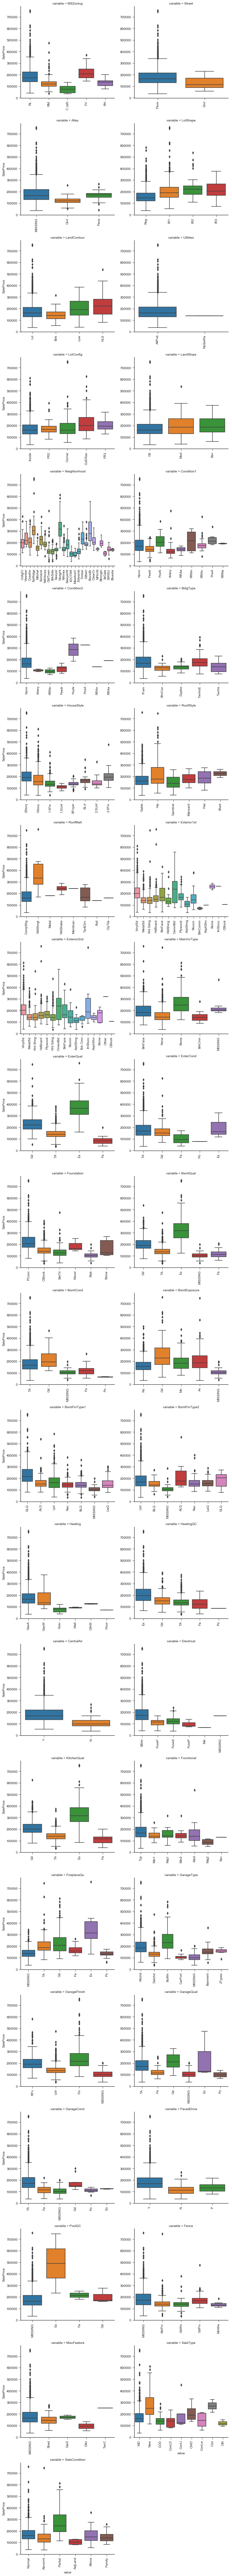

In [71]:
def boxplot(x, y, **kwargs):
    # https://stackoverflow.com/questions/44954123/rotate-xtick-labels-in-seaborn-boxplot
    ax = sns.boxplot(x=x, y=y)
    #plt.xticks(rotation=90) # This options also works to rotate
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    
# We chose FacetGrid to make a plot for each feature. Each plot has independent (x,y) axis 
g = sns.FacetGrid(df_categories, col="variable", col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

Some categories seem to more diverse with respect to SalePrice than others. Neighborhood has big impact on house prices.Also KitchenQual has an impact in increasing the price. Most expensive seems to be Partial SaleCondition. Having pool on property seems to improve price substantially. There are also differences in variabilities between category values.

Therefore, we can make a quick **estimation of influence of categorical variable on SalePrice**. For each variable SalePrices are partitioned to distinct sets based on category values. Then check with ANOVA test if sets have similar distributions (the null hypothesis is that the means of the measured variable are the same for the different categories of data; the alternative hypothesis is that they are not all the same). If the variable has minor impact then set means should be equal (less variability). Decreasing pval is sign of increasing diversity in partitions (mean is different, rejecting the null hypothesis).

In [72]:
def anova(dframe):
    anov = pd.DataFrame()
    # asignation of coumn with qualitative features
    anov['feature'] = qualitative
    pvalues = []
    for feature in qualitative:
        # list to collect sales price per category per feature
        samples = []
        for category in dframe[feature].unique():
            salepricecateg = dframe[dframe[feature] == category]['SalePrice'].values
            samples.append(salepricecateg)
        # one way anova acepts sample1, sample2, ... : array_like. The sample measurements 
        # for each group(category) per feature. 
        # * splits the sequence into separate arguments for the fuction to call.
        pval = stats.f_oneway(*samples)[1]
        pvalues.append(pval)
    # add all the list of pvalues for each category    
    anov['pval'] = pvalues
    return anov.sort_values('pval')

In [80]:
# We can see that the pvalues can be very small so we need to tranform them to 
# visulise which variables have bigger impact
a = anova(df_train)
a.head(10)

,feature,pval
8,Neighborhood,1.558600e-225
18,ExterQual,1.439551e-204
21,BsmtQual,8.158548e-196
30,KitchenQual,3.032213e-192
34,GarageFinish,6.228747e-115
32,FireplaceQu,2.971217e-107
20,Foundation,5.791895e-91
33,GarageType,6.117026e-87
24,BsmtFinType1,2.386358e-71
27,HeatingQC,2.667062e-67


In [86]:
# If we take the log of a small number it will be negative and big. But if we take 1/log
# It will be a big positive number. So the smallest the pvalue, we reject the null hypothesis.
# That menas a bigger 1/log that is showing more variability of the categories with respect the Sale Price
# within that feature. 
a['disparity'] = np.log(1 / a['pval'].values)

In [97]:
a['disparity'].head()

8     517.637858
18    469.363028
21    449.207612
30    440.987045
34    262.968110
Name: disparity, dtype: float64

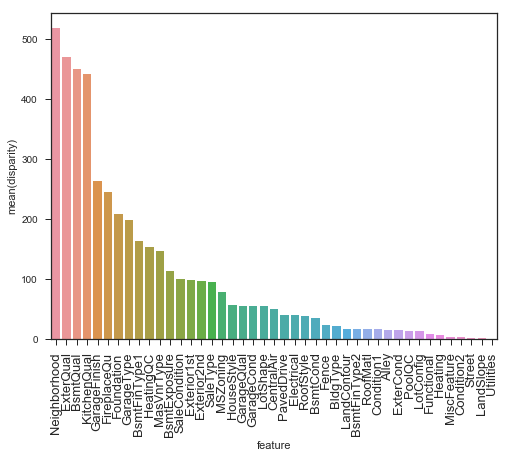

In [94]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(data=a, x='feature', y='disparity')
fig.set_xticklabels(ax.get_xticklabels(),rotation=90, size=13)
None

In the next pice of code, the qualitative variables get encoded according to ordering based on mean of SalePrice. This is a type of ranking the categories accoriding with the mean SalePrice (the cheaper best ranked).

In [186]:
def encode_meanSP(dframe, feature):
    ordering = pd.DataFrame()
    # Getting the calue of categories in the feature
    ordering['val'] = dframe[feature].unique()
    # Making the index equal to the category values
    ordering.index = ordering.val
    # Getting the mean value of SalePrice in each category
    ordering['spmeancategory'] = dframe[[feature, 'SalePrice']].groupby(feature).mean()
    ordering = ordering.sort_values('spmeancategory')
    # The order is ascendent, so we add an ordering value 1,2, etc accoridngly with the ascendent value
    ordering['ordering'] = range(1, ordering.shape[0] + 1 )
    # transform a dictionary with the category as key and value the ordering number (ascending order of SP mean)
    ordering = ordering['ordering'].to_dict()
    
    # Adding new columns of the categorical features that contains the ordered value according with
    # the SP mean obtained pear each category within a feature
    for category, orderval in ordering.items():
        dframe.loc[dframe[feature] == category, feature + "_E"] = orderval

In [187]:
# Getting the list of the new columns related to the categorical fetures and adding 
# to the training set the new values of the ordering of the SP mean for each cacegory within a feature
qualitative_ecoded = []
df_train_copy = df_train.copy()

for feature in qualitative:
    encode_meanSP(df_train_copy, feature)
    qualitative_ecoded.append(feature + "_E")
print qualitative_ecoded     

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


#### Notes on ANOVA test

Use one-way anova when you have one **categorical variable and one numerical variable**; the categorical variable divides the numerical variable into two or more groups. **It tests whether the means of the numerical variable are the same for the different groups**. Ane example of categorical variables is *sex*, the possible values are male or female.

The basic idea is to calculate the mean of the observations within each group, then compare the variance among these means to the average variance within each group. Under the null hypothesis that the observations in the different groups all have the same mean, the weighted among-group variance will be the same as the within-group variance. As the means get further apart, the variance among the means increases. The test statistic is thus the ratio of the variance among means divided by the average variance within groups, or Fs. This statistic has a known distribution under the null hypothesis, so the probability of obtaining the observed Fs under the null hypothesis can be calculated.

The shape of the F-distribution depends on two degrees of freedom, the degrees of freedom of the numerator (among-group variance) and degrees of freedom of the denominator (within-group variance). The among-group degrees of freedom is the number of groups minus one. The within-groups degrees of freedom is the total number of observations, minus the number of groups. Thus if there are n observations in a groups, numerator degrees of freedom is a-1 and denominator degrees of freedom is n-a. For the example data set, there are 5 groups and 39 observations, so the numerator degrees of freedom is 4 and the denominator degrees of freedom is 34. Whatever program you use for the anova will almost certainly calculate the degrees of freedom for you.

The conventional way of reporting the complete results of an anova is with a table (the "sum of squares" column is often omitted). If you're not going to use the mean squares for anything, you could just report this as "The means were significantly heterogeneous (one-way anova, $F_{4, 34}=7.12$, $P=2.8\times 10^{-4}$)." The degrees of freedom are given as a subscript to F, with the numerator first.

**One-way anova assumes that the observations within each group are normally distributed. It is not particularly sensitive to deviations from this assumption**; if you apply one-way anova to data that are non-normal, your chance of getting a P value less than 0.05, if the null hypothesis is true, is still pretty close to 0.05. It's better if your data are close to normal, so after you collect your data, you should calculate the residuals (the difference between each observation and the mean of its group) and plot them on a histogram. If the residuals look severely non-normal, try data transformations and see if one makes the data look more normal. The reference of this aterial is [here].(http://www.biostathandbook.com/onewayanova.html)

One-way annova is implemented in [scipy stats](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.f_oneway.html), it has important assumptions that must be satisfied in order for the associated p-value to be valid.

* The samples are independent.
* Each sample is from a normally distributed population.
* The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

If these assumptions are not true for a given set of data, it may still be possible to use the Kruskal-Wallis H-test (scipy.stats.kruskal) although with some loss of power. The algorithm is from Heiman[2], pp.394-7. Explantion of how it works [here](http://www.biostathandbook.com/kruskalwallis.html).

More materail about [one way anovva using python](http://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)

Use two-way anova when you have one numerical variable and two categorical variables, and each value of one categorical variable is found in combination with each value of the other categorical variable. A two-way anova with replication tests three null hypotheses: that the means of observations grouped by one factor are the same; that the means of observations grouped by the other factor are the same; and that there is no interaction between the two factors. The interaction test tells you whether the effects of one factor depend on the other factor. More details [here](http://www.biostathandbook.com/twowayanova.html). 


More materail about ways to do a [two-way ANOVA with Python](http://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/)

#### Fidning Correlations

The correlation among the numerical or quantitative variables is analised in the next section. But in this section the correlation analisys among the qualitative variables will be carried out using the [Spearman's correlation](https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php) since it determines the strength and direction of the **monotonic relationship** (could be nonlinear) between two variables rather than the strength and direction of the linear relationship between two variables, which is what [Pearson's correlation](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php) determines.

In [219]:
def spearman(dframe, features):
    sprm = pd.DataFrame()
    sprm['features'] = features
    # List of correlation of each feature with SalePrice
    sprm['spearman'] = [dframe[f].corr(dframe['SalePrice'], method='spearman') for f in features]
    sprm = sprm.sort_values('spearman')
    # plot
    plt.figure(figsize=(6, 0.25 * len(features)))
    sns.barplot(data=sprm, x='spearman', y='features', orient='h')


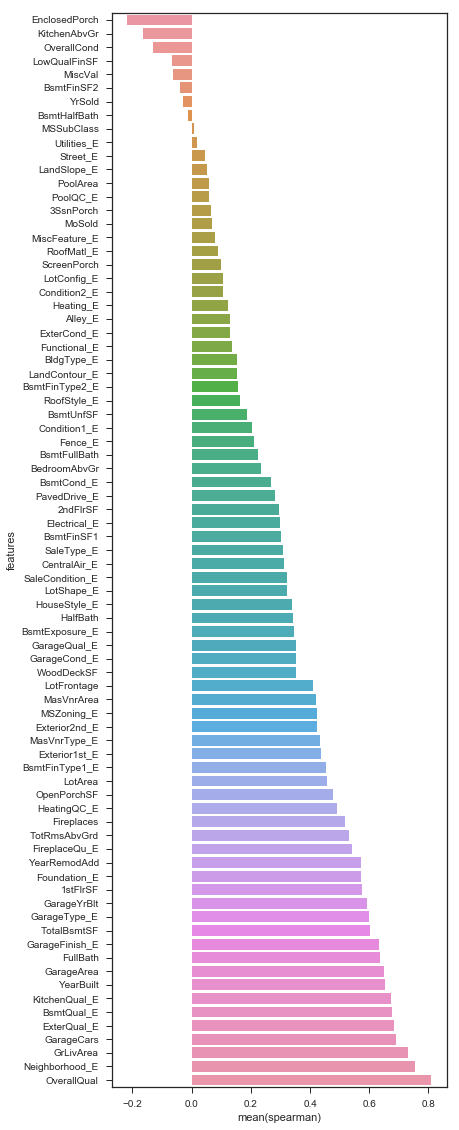

In [225]:
# Adding all the qualitative and quantitative_encoded
features = quantitative + qualitative_ecoded
# Removing 'SalesPrice' since ti will have a correlation of 1 with itself
features.remove('SalePrice')
spearman(df_train_copy, features)

<a id="section3"></a>
## Keep calm and work smart

Until now we just followed our intuition and analysed the variables we thought were important. In spite of our efforts to give an objective character to our analysis, we must say that our starting point was subjective.
As an engineer, I don't feel comfortable with this approach. All my education was about developing a disciplined mind, able to withstand the winds of subjectivity. There's a reason for that. Try to be subjective in structural engineering and you will see physics making things fall down. It can hurt.
So, let's overcome inertia and do a more objective analysis.

### The 'plasma soup'
'In the very beginning there was nothing except for a plasma soup. What is known of these brief moments in time, at the start of our study of cosmology, is largely conjectural. However, science has devised some sketch of what probably happened, based on what is known about the universe today.' (source: http://umich.edu/~gs265/bigbang.htm)

To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).
* Correlation matrix (heatmap style)

#### Correlation matrix (heatmap style)



In [37]:
#correlation matrix
corrmat = df_train.corr()
corrmat.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


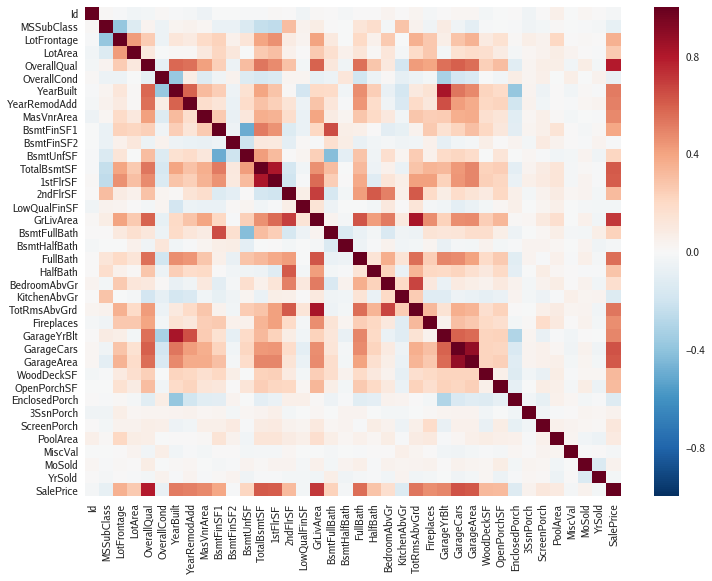

In [83]:
plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=False)

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

####  'SalePrice' correlation matrix (zoomed heatmap style)

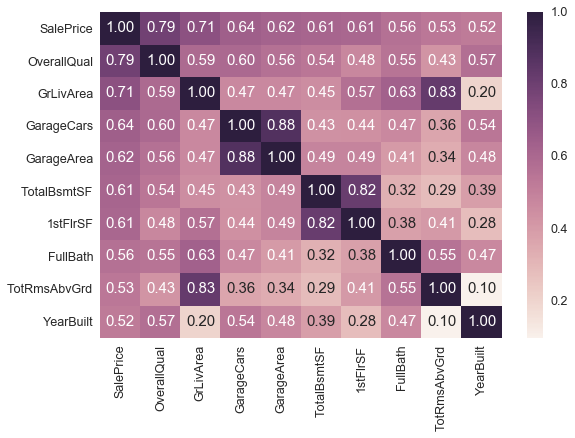

In [140]:
# Slice of correlation matrix with 10 largest cases
k = 10 # number of variables for heatmap
# From our correlation matrix get data the 10 largest values starting from 'SalePrice'
df_k = corrmat.nlargest(k, 'SalePrice')
# The index/rows of df_k are the 10 largest of the corrmat with all the other columns
# Therefore we chose a slice of df_k with just those columns to plot the heatmap 
columns = df_k['SalePrice'].index
plt.subplots(figsize=(9, 6))
sns.set(font_scale=1.25)
hm_k = sns.heatmap(df_k[columns], annot=True, square=False, fmt='.2f', annot_kws={'size': 15})

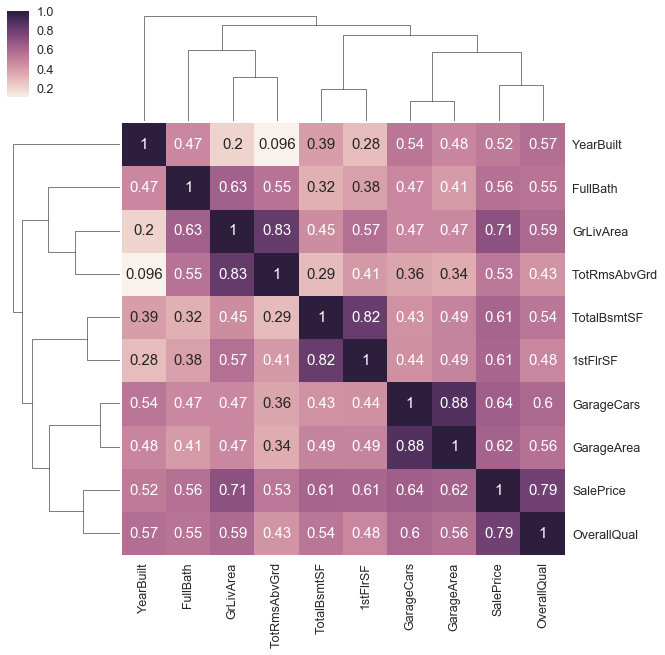

In [170]:
cm_k = sns.clustermap(df_k[columns], annot=True)
plt.setp(cm_k.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show() # Added this line to get rid of the vertical column of Nones before plotting 

Let's have a look at clustering. First we use the defult method for hierarchical/agglomerative clustering (average) and metric (euclidean).
About the methods you can look at this [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html), and about the metrics in this other [one](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html):

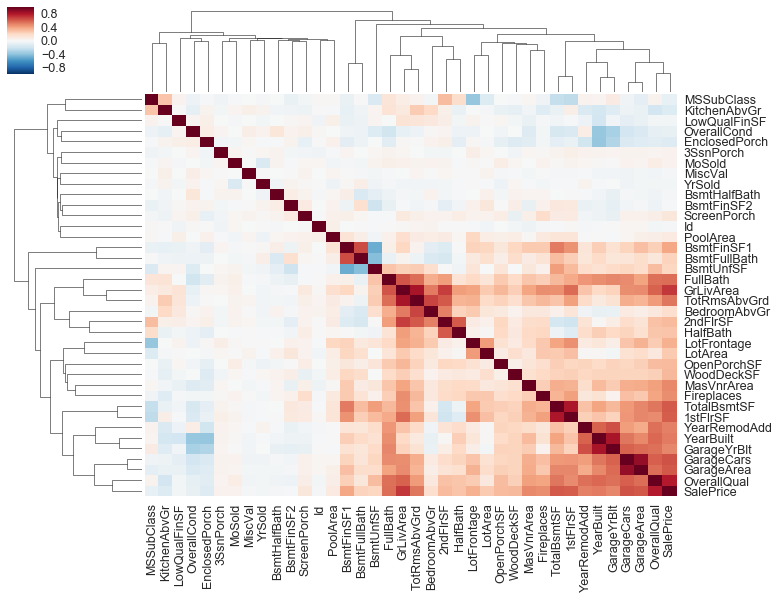

In [172]:
# Link to make this plot with the right direcftion of labels http://stackoverflow.com/questions/34572177/labels-for-clustermap-in-seaborn
clust_1 = sns.clustermap(corrmat, figsize=(12, 9))
plt.setp(clust_1.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show() # Added this line to get rid of the vertical column of Nones before plotting 

In [94]:
# The hierarchical clustering distance values, you can access the linkage matrics for rows or columns with:
clust_1.dendrogram_col.linkage # linkage matrix for columns
clust_1.dendrogram_row.linkage # linkage matrix for rows

array([[ 26.        ,  27.        ,   0.27374196,   2.        ],
       [  6.        ,  25.        ,   0.41226964,   2.        ],
       [ 12.        ,  13.        ,   0.43397534,   2.        ],
       [  4.        ,  37.        ,   0.52125497,   2.        ],
       [ 16.        ,  23.        ,   0.62778916,   2.        ],
       [  9.        ,  17.        ,   0.80484235,   2.        ],
       [  7.        ,  39.        ,   0.81371826,   3.        ],
       [ 38.        ,  41.        ,   0.83038791,   4.        ],
       [ 14.        ,  20.        ,   0.91613802,   2.        ],
       [  2.        ,   3.        ,   1.00495405,   2.        ],
       [ 19.        ,  42.        ,   1.0228527 ,   3.        ],
       [  8.        ,  24.        ,   1.16149429,   2.        ],
       [ 44.        ,  45.        ,   1.19049681,   7.        ],
       [ 21.        ,  46.        ,   1.26741273,   3.        ],
       [ 28.        ,  49.        ,   1.30340631,   3.        ],
       [  1.        ,  22

In [102]:
# Notes: https://stats.stackexchange.com/questions/165194/using-correlation-as-distance-metric-for-hierarchical-clustering

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and * 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
* 'FullBath'?? Really?
* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
* Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

Let's proceed to the scatter plots.

#### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

Get ready for what you're about to see. I must confess that the first time I saw these scatter plots I was totally blown away! So much information in so short space... It's just amazing. Once more, thank you @seaborn! You make me 'move like Jagger'!

In [166]:
# chosing the columns to plot
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']

In [167]:
df_train[col].head()

,SalePrice,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt
0,208500,7,1710,856,2,2,2003
1,181500,6,1262,1262,2,2,1976
2,223500,7,1786,920,2,2,2001
3,140000,7,1717,756,3,1,1915
4,250000,8,2198,1145,3,2,2000


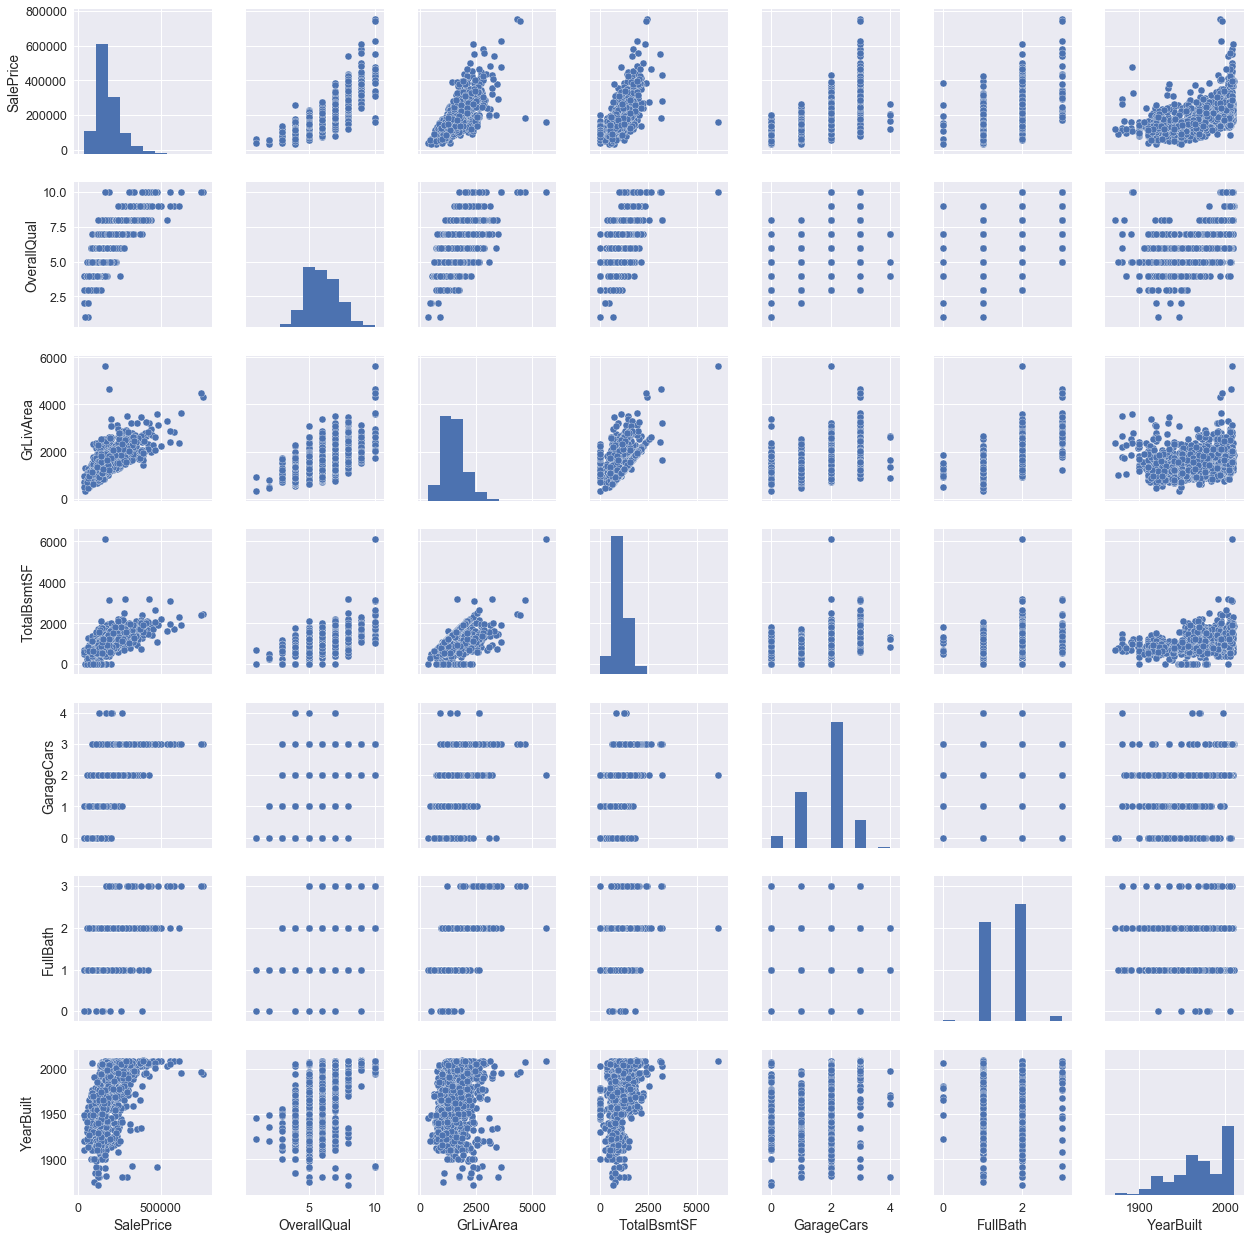

In [169]:
sns.pairplot(df_train[col])

In [176]:
# Function to pass to each plot to get the correlation and the p-value
# http://stackoverflow.com/questions/34255242/seaborn-pairplot-pearsons-p-statistic

def corrfunc(x, y, **kws):
    (r, p) = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    #ax.annotate("p = {:.3f}".format(p),
    #            xy=(.4, .9), xycoords=ax.transAxes)

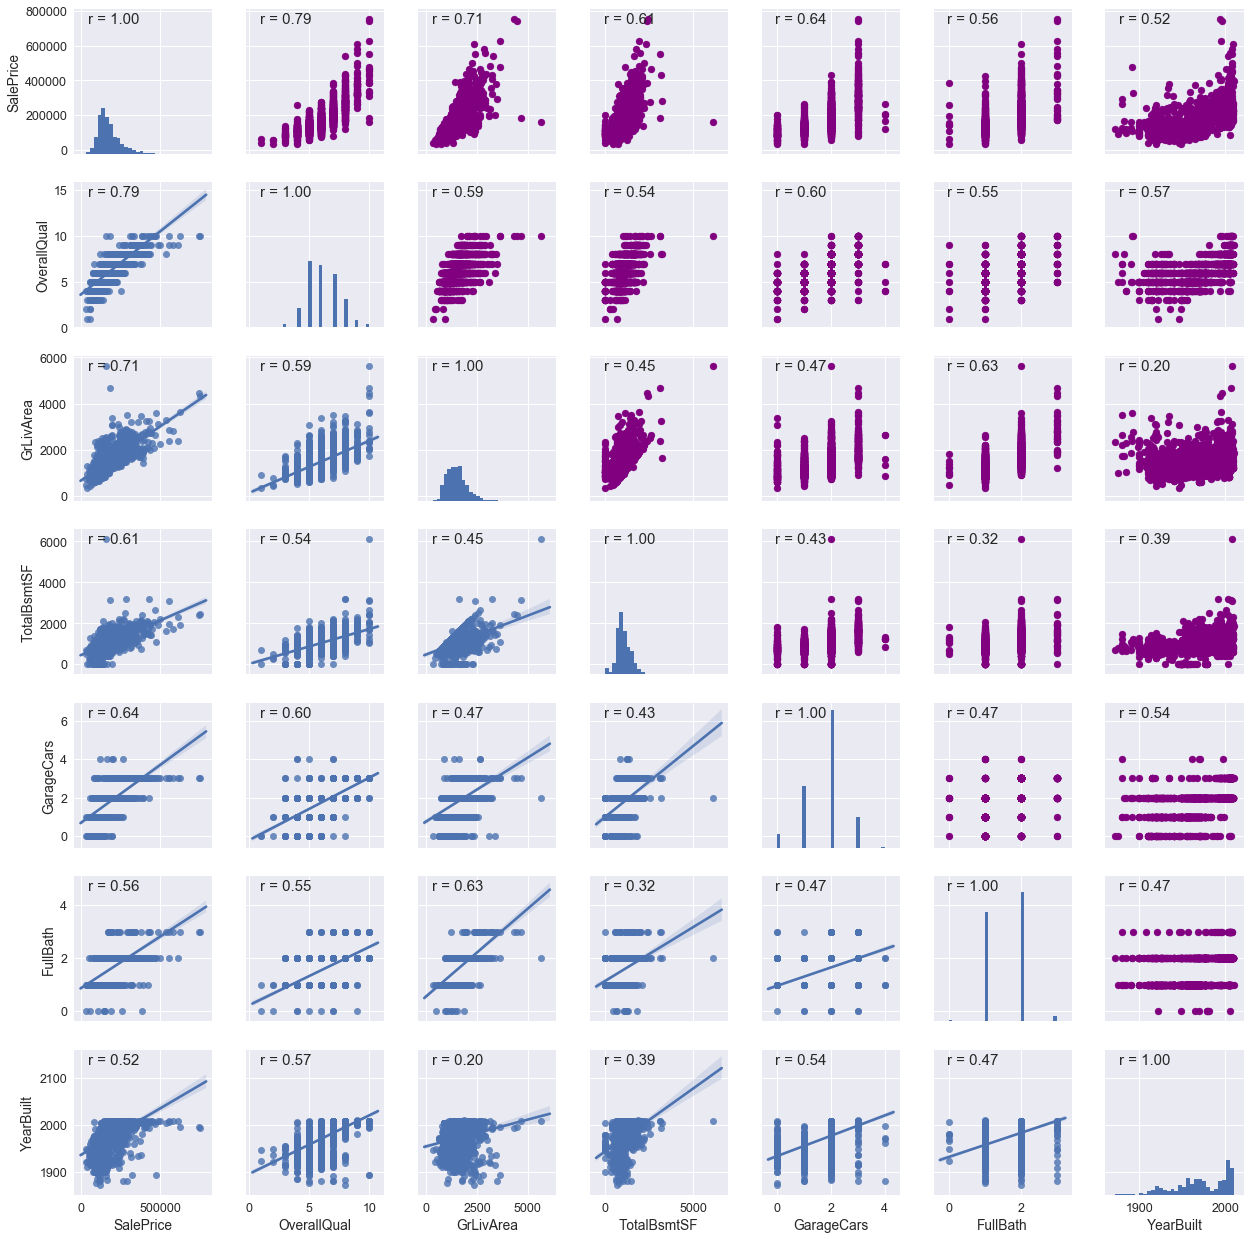

In [179]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
figs_corr = sns.PairGrid(df_train[col])

# Using map_upper we can specify what the upper triangle will look like.
figs_corr = figs_corr.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
figs_corr =figs_corr.map_lower(sns.regplot)
# figs_corr =figs_corr.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
figs_corr = figs_corr.map_diag(plt.hist, bins=30)

# plotting correlation value and p value
figs_corr =figs_corr.map(corrfunc)

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

Ok, enough of Rorschach test for now. Let's move forward to what's missing: missing data!

## 4. Missing data

Important questions when thinking about missing data:
* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [4]:
# total number of null values per column
total_null_sum_per_columns = df_train.isnull().sum().sort_values(ascending=False)
print total_null_sum_per_columns

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [5]:
# Total number of data per column
total_data_per_column = df_train.isnull().count()
print total_data_per_column

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
Street           1460
Alley            1460
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1460
MasVnrArea       1460
ExterQual        1460
ExterCond        1460
Foundation       1460
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu      1460
GarageType       1460
GarageYrBlt      1460
GarageFinish     1460
GarageCars       1460
GarageArea       1460
GarageQual       1460
GarageCond       1460
PavedDrive

In [6]:
len(df_train)

1460

In [7]:
percetage_null_per_column = (total_null_sum_per_columns / total_data_per_column).sort_values(ascending=False)

In [8]:
missing_data = pd.concat([total_null_sum_per_columns, percetage_null_per_column], axis=1, keys=['Total', 'Percent'])

In [9]:
missing_data.sort_values(['Total', 'Percent'], ascending=[False, True], inplace=True)

In [75]:
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageType,81,0.055479


In [11]:
# not null values (categorical)
df_train['PoolQC'][df_train['PoolQC'].notnull()]

197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
Name: PoolQC, dtype: object

In [12]:
df_train['MiscFeature'][df_train['MiscFeature'].notnull()].head()

5     Shed
7     Shed
16    Shed
17    Shed
51    Shed
Name: MiscFeature, dtype: object

In [13]:
missing_data[missing_data['Percent'] != 0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageType,81,0.055479


In [14]:
df_train['MasVnrType'][df_train['MasVnrType'].notnull()].head()

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object

In [15]:
df_train['MasVnrArea'][df_train['MasVnrArea'].notnull()]

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
5         0.0
6       186.0
7       240.0
8         0.0
9         0.0
10        0.0
11      286.0
12        0.0
13      306.0
14      212.0
15        0.0
16      180.0
17        0.0
18        0.0
19        0.0
20      380.0
21        0.0
22      281.0
23        0.0
24        0.0
25      640.0
26        0.0
27      200.0
28        0.0
29        0.0
        ...  
1430      0.0
1431      0.0
1432      0.0
1433    318.0
1434      0.0
1435    237.0
1436      0.0
1437    426.0
1438      0.0
1439     96.0
1440      0.0
1441    147.0
1442    160.0
1443      0.0
1444    106.0
1445      0.0
1446    189.0
1447    438.0
1448      0.0
1449      0.0
1450      0.0
1451    194.0
1452     80.0
1453      0.0
1454      0.0
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1452, dtype: float64

In [18]:
corrmat.loc['MasVnrArea', 'YearBuilt']

0.31570706243619523

In [19]:
corrmat.loc['OverallQual', 'MasVnrArea']

0.41187566727767955

Let's analyse this to understand how to handle the missing data.

**We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed**. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5in5  problems). **Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables**.

Regarding 'MasVnrArea' and 'MasVnrType' (numerical, categorical), we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered (look above). Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [20]:
# We want to keep Electrical since just one observation is Null
# therefore we get the name of the columns we want to drop
columns_to_drop = missing_data[missing_data['Total'] > 1].index
columns_to_drop

Index([u'PoolQC', u'MiscFeature', u'Alley', u'Fence', u'FireplaceQu',
       u'LotFrontage', u'GarageCond', u'GarageFinish', u'GarageQual',
       u'GarageType', u'GarageYrBlt', u'BsmtExposure', u'BsmtFinType2',
       u'BsmtCond', u'BsmtFinType1', u'BsmtQual', u'MasVnrArea',
       u'MasVnrType'],
      dtype='object')

In [74]:
df_train = df_train.drop(columns_to_drop, axis=1)
df_train.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [76]:
# removing electrical null
df_train = df_train.drop(df_train[df_train['Electrical'].isnull()].index, axis=0)

In [77]:
# cheking there is not missing data
df_train.isnull().sum().max()

0

## Out liars!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.
Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

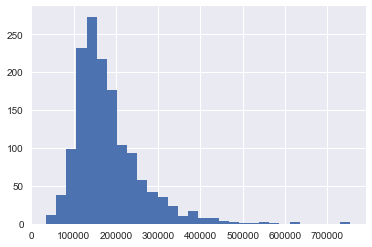

In [78]:
df_train['SalePrice'].hist(bins=30)

In [25]:
# Getting a Series 1D
print df_train['SalePrice'].shape
# Getting a 2 D numpy array
saleprice = df_train['SalePrice'][:, np.newaxis]
print saleprice

(1459,)
[[208500]
 [181500]
 [223500]
 ..., 
 [266500]
 [142125]
 [147500]]


In [79]:
#standardizing data: we need a X numpy array of shape [n_samples, n_features]
# In this case we need the 'SalePrice' as a numpy array wuth n saples and one feature
saleprice_scaled = StandardScaler().fit_transform(saleprice)

In [80]:
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ..., 
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [81]:
saleprice_scaled.shape

(1459, 1)

(array([  11.,   38.,   99.,  232.,  273.,  217.,  176.,  104.,   93.,
          58.,   42.,   35.,   24.,   10.,   17.,    8.,    7.,    4.,
           2.,    1.,    1.,    2.,    1.,    0.,    2.,    0.,    0.,
           0.,    0.,    2.]),
 array([-1.83820775, -1.53605754, -1.23390734, -0.93175714, -0.62960694,
        -0.32745674, -0.02530653,  0.27684367,  0.57899387,  0.88114407,
         1.18329427,  1.48544447,  1.78759468,  2.08974488,  2.39189508,
         2.69404528,  2.99619548,  3.29834569,  3.60049589,  3.90264609,
         4.20479629,  4.50694649,  4.80909669,  5.1112469 ,  5.4133971 ,
         5.7155473 ,  6.0176975 ,  6.3198477 ,  6.62199791,  6.92414811,
         7.22629831]),
 <a list of 30 Patch objects>)

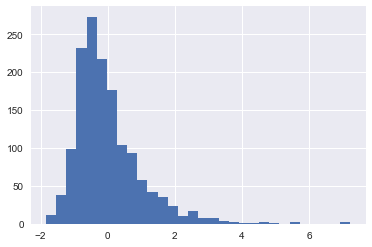

In [29]:
plt.hist(saleprice_scaled, bins=30)

### Finding outliers

#### First

In [82]:
# We will try to find the  10 values that are outliers in three ways 
# First using the argsort() method to get the 10 lowest and higger values in the array
# 1D (vector) nupy arrya
saleprice_scaled[:,0].shape

(1459,)

In [83]:
# Getting the indexes of the lowest 10. Note: argsort() does in ascending 
low_range_indexes = saleprice_scaled[:, 0].argsort()[:10]
print low_range_indexes

[ 495  916  968  533   30  710 1337  705 1325  812]


In [84]:
# Getting the indexes of the last 10 higher outliers
high_range_indexes = saleprice_scaled[:, 0].argsort()[-10:]
print high_range_indexes

[ 798  178  769  440 1046  803  898 1169 1182  691]


In [85]:
# outer range (low) of the distribution:
saleprice_scaled[low_range_indexes]

array([[-1.83820775],
       [-1.83303414],
       [-1.80044422],
       [-1.78282123],
       [-1.77400974],
       [-1.62295562],
       [-1.6166617 ],
       [-1.58519209],
       [-1.58519209],
       [-1.57269236]])

In [86]:
# outer range (high) of the distribution:
saleprice_scaled[high_range_indexes]

array([[ 3.82758058],
       [ 4.0395221 ],
       [ 4.49473628],
       [ 4.70872962],
       [ 4.728631  ],
       [ 5.06034585],
       [ 5.42191907],
       [ 5.58987866],
       [ 7.10041987],
       [ 7.22629831]])

How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

{'boxes': [<matplotlib.lines.Line2D at 0x118f8dc50>],
 'caps': [<matplotlib.lines.Line2D at 0x119071bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11907ced0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11907c890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x118f8de50>,
  <matplotlib.lines.Line2D at 0x119071590>]}

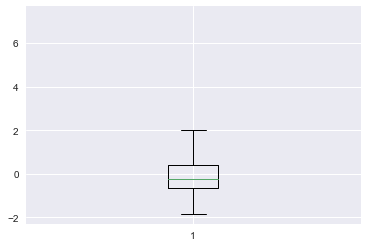

In [35]:
plt.boxplot(saleprice_scaled)

#### Second way is directly sorting the values

In [36]:
saleprice_scaled[:,0].sort()

In [37]:
# outer range (low) of the distribution:
saleprice_scaled[:,0][:10]

array([-1.83820775, -1.83303414, -1.80044422, -1.78282123, -1.77400974,
       -1.62295562, -1.6166617 , -1.58519209, -1.58519209, -1.57269236])

In [38]:
# outer range (high) of the distribution:
saleprice_scaled[:,0][-10:]

array([ 3.82758058,  4.0395221 ,  4.49473628,  4.70872962,  4.728631  ,
        5.06034585,  5.42191907,  5.58987866,  7.10041987,  7.22629831])

#### Third form is caluclating the quatile ore percentile

In [39]:
low_quartile = np.percentile(saleprice_scaled[:,0], 5)
low_quartile

-1.16979325957728

In [40]:
high_quartile = np.percentile(saleprice_scaled[:,0], 95)
high_quartile

1.8286310456042525

In [442]:
saleprice_scaled[:,0]

array([-1.83870376, -1.83352844, -1.80092766, ...,  5.59185509,
        7.10289909,  7.22881942])

In [47]:
low_outliers = [x for x in saleprice_scaled[:,0] if x < low_quartile]

In [49]:
high_outliers = [x for x in saleprice_scaled[:,0] if x > high_quartile]

In [52]:
# total number of outliers
print len(high_outliers)
print len(low_outliers)

73
71


In [87]:
df_train['SalePriceScale'] = saleprice_scaled

In [88]:
# Looking which are the cases with outliers in the orignal data with 7 in the scale data
df_high_out = df_train.loc[high_range_indexes]

In [91]:
df_high_out[['SalePrice', 'SalePriceScale', 'GrLivArea']]

,SalePrice,SalePriceScale,GrLivArea
798,485000,3.827581,3140
178,501837,4.039522,2234
769,538000,4.494736,3279
440,555000,4.708730,2402
1046,556581,4.728631,2868
803,582933,5.060346,2822
898,611657,5.421919,2364
1169,625000,5.589879,3627
1182,745000,7.100420,4476
691,755000,7.226298,4316


In [92]:
df_low_out = df_train.loc[low_range_indexes]

In [93]:
df_low_out[['SalePrice', 'SalePriceScale', 'GrLivArea']]

,SalePrice,SalePriceScale,GrLivArea
495,34900,-1.838208,720
916,35311,-1.833034,480
968,37900,-1.800444,968
533,39300,-1.782821,334
30,40000,-1.774010,1317
710,52000,-1.622956,729
1337,52500,-1.616662,693
705,55000,-1.585192,1092
1325,55000,-1.585192,796
812,55993,-1.572692,1044


### Bivariate analysis
We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover. As Alan Kay said, 'a change in perspective is worth 80 IQ points'.



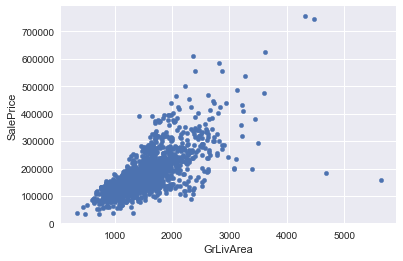

In [101]:
#bivariate analysis saleprice/grlivarea
# Plotting the orignal data
df_train.plot.scatter(x='GrLivArea', y='SalePrice')

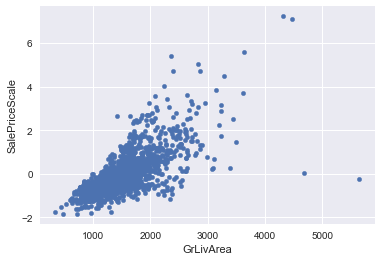

In [105]:
# Standarised data
df_train.plot.scatter(x='GrLivArea', y='SalePriceScale')

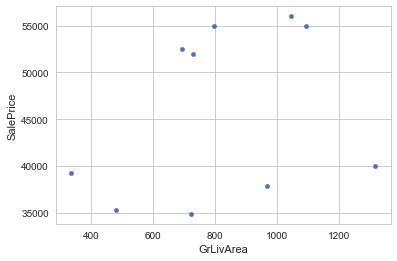

In [110]:
# Low outliers
df_low_out.plot.scatter(x='GrLivArea', y='SalePrice')

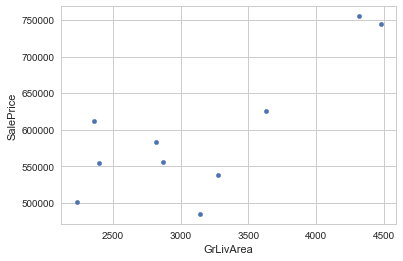

In [109]:
df_high_out.plot.scatter(x='GrLivArea', y='SalePrice')

In [142]:
# Properties that looks as outliers
outliers_from_trent = df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 200000)][['SalePrice', 'SalePriceScale', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']]
outliers_from_trent

,SalePrice,SalePriceScale,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt
523,184750,0.048081,10,4676,3138,3,3,2007
1298,160000,-0.263469,10,5642,6110,2,2,2008


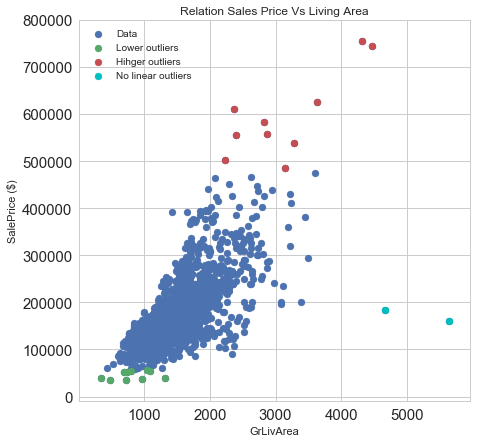

In [158]:
# Traying to plot the data + outliers
# colors https://matplotlib.org/api/colors_api.html
fig_out = plt.figure(figsize=(7, 7))
ax1 = fig_out.add_subplot(111)

ax1.scatter(df_train['GrLivArea'], df_train['SalePrice'], label='Data')
ax1.scatter(df_low_out['GrLivArea'], df_low_out['SalePrice'], label='Lower outliers')
ax1.scatter(df_high_out['GrLivArea'], df_high_out['SalePrice'], label='Hihger outliers')
ax1.scatter(outliers_from_trent['GrLivArea'], outliers_from_trent['SalePrice'], c='c', label='No linear outliers')
plt.title('Relation Sales Price Vs Living Area')
plt.xlabel('GrLivArea', fontsize=15)
plt.ylabel('SalePrice ($)', fontsize=15)
plt.legend(loc='upper left', fontsize='medium')
plt.tick_params(labelsize=15)

What has been revealed:
* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them. Thye are properites of around 10 years. 

* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [113]:
df_high_out

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceScale
798,799,60,RL,13518,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2009,New,Partial,485000,3.827581
178,179,20,RL,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,7,2009,New,Partial,501837,4.039522
769,770,60,RL,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,...,0,210,0,0,6,2010,WD,Normal,538000,4.494736
440,441,20,RL,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,170,0,0,4,2009,WD,Normal,555000,4.708730
1046,1047,60,RL,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2006,New,Partial,556581,4.728631
803,804,60,RL,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,192,0,0,1,2009,New,Partial,582933,5.060346
898,899,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,3,2010,New,Partial,611657,5.421919
1169,1170,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,7,2006,WD,Normal,625000,5.589879
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,555,0,7,2007,WD,Abnorml,745000,7.100420
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,2007,WD,Normal,755000,7.226298


In [130]:
df_low_out[['SalePrice', 'SalePriceScale', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']]

,SalePrice,SalePriceScale,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt
495,34900,-1.838208,4,720,720,0,1,1920
916,35311,-1.833034,2,480,480,1,0,1949
968,37900,-1.800444,3,968,600,0,1,1910
533,39300,-1.782821,1,334,0,0,1,1946
30,40000,-1.774010,4,1317,649,1,1,1920
710,52000,-1.622956,3,729,270,0,1,1935
1337,52500,-1.616662,4,693,693,0,1,1941
705,55000,-1.585192,4,1092,0,0,2,1930
1325,55000,-1.585192,4,796,796,0,1,1922
812,55993,-1.572692,5,1044,540,2,1,1952


In [131]:
df_high_out[['SalePrice', 'SalePriceScale', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']]

,SalePrice,SalePriceScale,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt
798,485000,3.827581,9,3140,1926,3,3,2008
178,501837,4.039522,9,2234,2216,3,2,2008
769,538000,4.494736,8,3279,1650,3,3,2003
440,555000,4.708730,10,2402,3094,3,2,2008
1046,556581,4.728631,9,2868,1992,3,3,2005
803,582933,5.060346,9,2822,1734,3,3,2008
898,611657,5.421919,9,2364,2330,3,2,2009
1169,625000,5.589879,10,3627,1930,3,3,1995
1182,745000,7.100420,10,4476,2396,3,3,1996
691,755000,7.226298,10,4316,2444,3,3,1994


## Apendix

Cheking trent of Log(x) and Log(1/x)

In [40]:
a = [0.0012, 0.023, 0.05, 0.12, 0.2, 0.34, 0.6]

In [41]:
b = [1 / x for x in a]

In [42]:
b

[833.3333333333334,
 43.47826086956522,
 20.0,
 8.333333333333334,
 5.0,
 2.941176470588235,
 1.6666666666666667]

In [43]:
c = [np.log(x) for x in b]

In [44]:
c

[6.7254337221881828,
 3.7722610630529876,
 2.9957322735539909,
 2.120263536200091,
 1.6094379124341003,
 1.0788096613719298,
 0.51082562376599072]

In [46]:
d

[-6.7254337221881828,
 -3.7722610630529876,
 -2.9957322735539909,
 -2.120263536200091,
 -1.6094379124341003,
 -1.0788096613719298,
 -0.51082562376599072]

In [100]:
w = np.arange(0, 2, 0.05)
pw = np.log(w)
pw_2 = np.log(1 / w)
pw_3 = np.exp(w)

In [101]:
pw

array([       -inf, -2.99573227, -2.30258509, -1.89711998, -1.60943791,
       -1.38629436, -1.2039728 , -1.04982212, -0.91629073, -0.7985077 ,
       -0.69314718, -0.597837  , -0.51082562, -0.43078292, -0.35667494,
       -0.28768207, -0.22314355, -0.16251893, -0.10536052, -0.05129329,
        0.        ,  0.04879016,  0.09531018,  0.13976194,  0.18232156,
        0.22314355,  0.26236426,  0.30010459,  0.33647224,  0.37156356,
        0.40546511,  0.43825493,  0.47000363,  0.50077529,  0.53062825,
        0.55961579,  0.58778666,  0.61518564,  0.64185389,  0.66782937])

In [102]:
pw_2

array([        inf,  2.99573227,  2.30258509,  1.89711998,  1.60943791,
        1.38629436,  1.2039728 ,  1.04982212,  0.91629073,  0.7985077 ,
        0.69314718,  0.597837  ,  0.51082562,  0.43078292,  0.35667494,
        0.28768207,  0.22314355,  0.16251893,  0.10536052,  0.05129329,
        0.        , -0.04879016, -0.09531018, -0.13976194, -0.18232156,
       -0.22314355, -0.26236426, -0.30010459, -0.33647224, -0.37156356,
       -0.40546511, -0.43825493, -0.47000363, -0.50077529, -0.53062825,
       -0.55961579, -0.58778666, -0.61518564, -0.64185389, -0.66782937])

In [103]:
pw_3

array([ 1.        ,  1.0512711 ,  1.10517092,  1.16183424,  1.22140276,
        1.28402542,  1.34985881,  1.41906755,  1.4918247 ,  1.56831219,
        1.64872127,  1.73325302,  1.8221188 ,  1.91554083,  2.01375271,
        2.11700002,  2.22554093,  2.33964685,  2.45960311,  2.58570966,
        2.71828183,  2.85765112,  3.00416602,  3.15819291,  3.32011692,
        3.49034296,  3.66929667,  3.85742553,  4.05519997,  4.26311452,
        4.48168907,  4.71147018,  4.95303242,  5.20697983,  5.47394739,
        5.75460268,  6.04964746,  6.35981952,  6.68589444,  7.02868758])

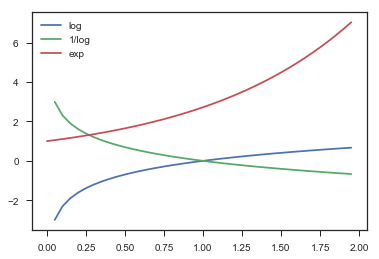

In [104]:
plt.plot(w, pw, label='log' )
plt.plot(w, pw_2, label='1/log')
plt.plot(w, pw_3, label='exp')
plt.legend()

The Log and 1/Log have a crossover when the varialbe is bigger than one. 1/Log is possitive when the values are smaller than one, which is useful if we want to check values of probabilit in that range. See ANOVA p values.